
# <p style="padding:10px;background-color:#8B0000;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">"Heart Disease Prediction Using Logistic Regression"</p>

 

### <p style="padding:10px;background-color:#0f5c59;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 20px;overflow:hidden;font-weight:500">Problem Statement</p>


#### Objective: Develop a logistic regression model to predict the likelihood of developing heart disease within the next ten years, using various health indicators and lifestyle factors.
- **Data Description** : The dataset includes variables such as age, gender, education, smoking status, daily cigarette consumption, blood pressure medication usage, stroke history, hypertension, diabetes status, total cholesterol, systolic and diastolic blood pressure, BMI, heart rate, glucose levels, and a binary target variable for heart disease occurrence.
- **Goal**: Enable early detection and proactive management of heart disease risks through an effective predictive model, enhancing preventive health strategies and patient outcomes.

In [237]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [238]:
raw_csv_data= pd.read_csv('CSV_Files/Heart_disease.csv')

In [239]:
raw_csv_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [240]:
#Making a copy of the raw_csv_data
df=raw_csv_data.copy()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [118]:
#To convert Categorival to numerical - encoding
#dfs['currentSmoker'].replace(['Non Smoker', 'Smoker'],
#                        [0,1], inplace=True)


# Data Cleaning

In [265]:
#Checking if there is any duplicate entry
df.duplicated().sum()


0

In [241]:
#Checking number of null values
df.isna().sum()*100/df.shape[0]
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [242]:
df.shape

(4238, 16)

In [243]:
#We can drop the rows where cigsperday, BPmeds, totChol, BMI and heartrate have missing value
#since total number or rows are above 4000(significantly large)

df.dropna(subset=['cigsPerDay','BPMeds','totChol','BMI','heartRate'], inplace=True)
df.isna().sum()

male                 0
age                  0
education          101
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose            339
TenYearCHD           0
dtype: int64

In [244]:
#Impute missing categorical variable by mode and missing numerical varibale by mean

from sklearn.impute import SimpleImputer


In [246]:
SI_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
SI_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [247]:
#Making a copy of the data
SI_data = df.copy(deep=True)

# Identify categorial columns and Impute them using mode.

catgegorical_cols =['education']
SI_data[catgegorical_cols] = SI_mode.fit_transform(SI_data[catgegorical_cols])

<span style='color:red'> After filling missing values we should always check for variance, variance should not change much

</span>

In [248]:
print(df['education'].var())
print(SI_data['education'].var())


1.0418213181802343
1.0393146112177543


In [249]:
# Identify Numerical Columns and Impute them using mean.

numerical_cols = ['glucose']
SI_data[numerical_cols] = SI_mean.fit_transform(SI_data[numerical_cols])

In [250]:
print(df['glucose'].var())
print(SI_data['glucose'].var())

570.638427949339
523.3062950707432


In [251]:
SI_data.isna().sum()
#SI_data.head(13)

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Detecting Outliers

C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\si

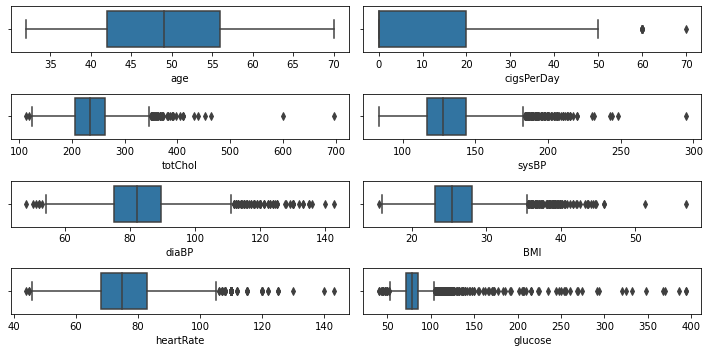

In [252]:
#Checking outliers

fig, axs = plt.subplots(4,2, figsize = (10,5))
plt1 = sns.boxplot(SI_data['age'], ax = axs[0,0])
plt2 = sns.boxplot(SI_data['cigsPerDay'], ax = axs[0,1])
plt3 = sns.boxplot(SI_data['totChol'], ax = axs[1,0])
plt1 = sns.boxplot(SI_data['sysBP'], ax = axs[1,1])
plt2 = sns.boxplot(SI_data['diaBP'], ax = axs[2,0])
plt3 = sns.boxplot(SI_data['BMI'], ax = axs[2,1])
plt3 = sns.boxplot(SI_data['heartRate'], ax = axs[3,0])
plt3 = sns.boxplot(SI_data['glucose'], ax = axs[3,1])


plt.tight_layout()

# Counting Outliers

In [253]:
#Function to count the number of outliers

def count_outliers(dataframe, column):
    percentile25 = dataframe[column].quantile(0.25)
    percentile75 = dataframe[column].quantile(0.75)
    iqr = percentile75-percentile25
    
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    outlier_count = ((dataframe[column]< lower_limit) | (dataframe[column]> upper_limit)).sum()
    print(column,':',outlier_count)
    

In [222]:
Numerical_cols = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

print('Number of otliers in each numerical colomns:','\n')
for col in Numerical_cols:
     count_outliers(SI_data, col)

Number of otliers in each numerical colomns: 

age : 0
cigsPerDay : 12
totChol : 51
sysBP : 122
diaBP : 81
BMI : 92
heartRate : 76
glucose : 254


# Removing Outliers

In [254]:
# Function to remove the outliers 

def remove_outliers(dataframe, column):
    percentile25 = dataframe[column].quantile(0.25)
    percentile75 = dataframe[column].quantile(0.75)
    iqr = percentile75-percentile25
    print(iqr)
    upper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    outlier_free = (dataframe[column]> lower_limit) & (dataframe[column] < upper_limit)
    #print(bool_array)
    dataframe = dataframe[outlier_free]
    return dataframe


In [255]:
for col in Numerical_cols:
    SI_data = remove_outliers(SI_data, col)

20.0
57.0
26.0
14.0
4.929999999999996
15.0
13.0


C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\cyril\anaconda3\lib\si

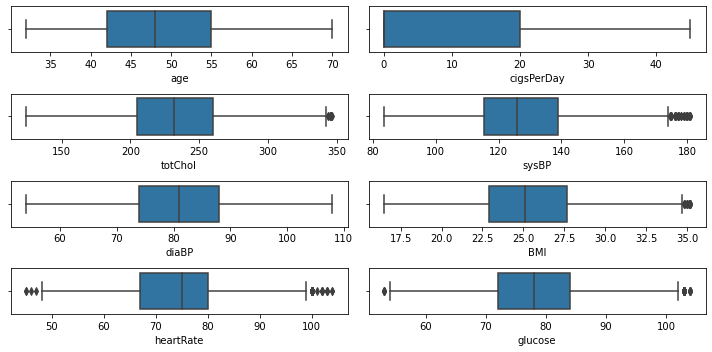

In [256]:
#Checking outliers

fig, axs = plt.subplots(4,2, figsize = (10,5))
plt1 = sns.boxplot(SI_data['age'], ax = axs[0,0])
plt2 = sns.boxplot(SI_data['cigsPerDay'], ax = axs[0,1])
plt3 = sns.boxplot(SI_data['totChol'], ax = axs[1,0])
plt1 = sns.boxplot(SI_data['sysBP'], ax = axs[1,1])
plt2 = sns.boxplot(SI_data['diaBP'], ax = axs[2,0])
plt3 = sns.boxplot(SI_data['BMI'], ax = axs[2,1])
plt3 = sns.boxplot(SI_data['heartRate'], ax = axs[3,0])
plt3 = sns.boxplot(SI_data['glucose'], ax = axs[3,1])


plt.tight_layout()

In [257]:
Numerical_cols = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

print('Number of otliers in each numerical colomns:','\n')
for col in Numerical_cols:
     count_outliers(SI_data, col)

Number of otliers in each numerical colomns: 

cigsPerDay : 0
totChol : 11
sysBP : 40
diaBP : 0
BMI : 18
heartRate : 87
glucose : 42


In [258]:
SI_data.shape

(3472, 16)

# Visualization

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

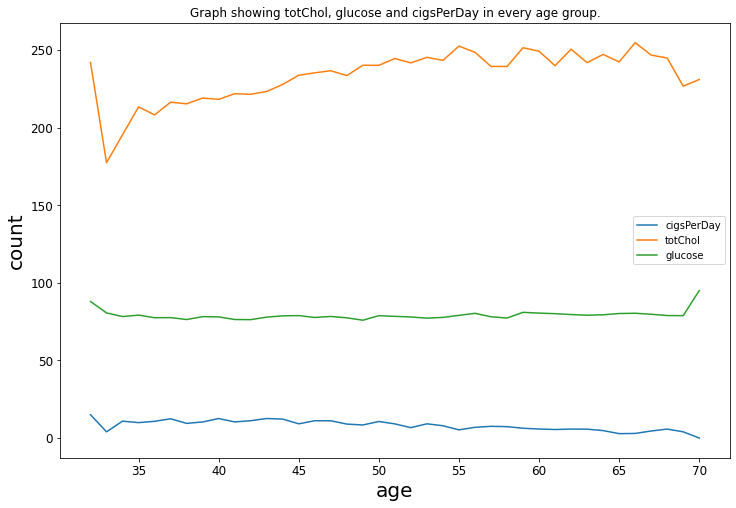

In [269]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_1 = SI_data.groupby("age").cigsPerDay.mean()
graph_2 = SI_data.groupby("age").totChol.mean()
graph_3 = SI_data.groupby("age").glucose.mean()

plt.figure(figsize=(12,8))
sns.lineplot(data=graph_1, label="cigsPerDay")
sns.lineplot(data=graph_2, label="totChol")
sns.lineplot(data=graph_3, label="glucose")
plt.title("Graph showing totChol, glucose and cigsPerDay in every age group.")
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [273]:
#checking for which gender has more risk of coronary heart disease CHD

graph_6 = SI_data.groupby("male", as_index=False).TenYearCHD.sum()
graph_6


,male,TenYearCHD
0,0,186
1,1,261


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

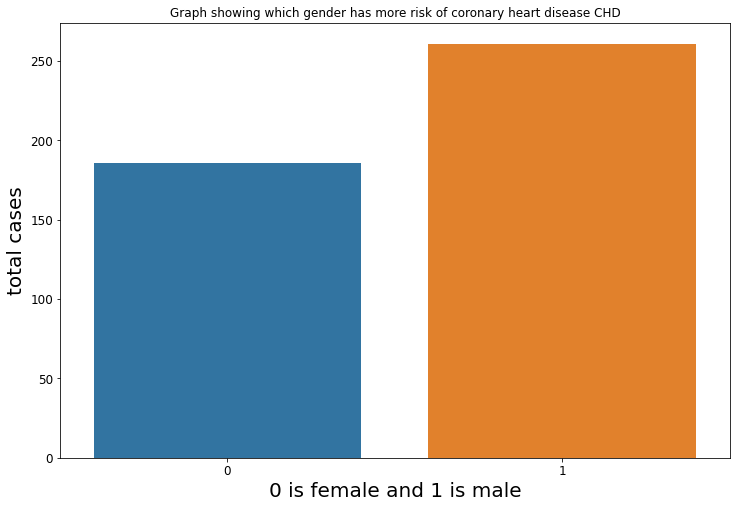

In [274]:
#Ploting the above values

plt.figure(figsize=(12,8))
sns.barplot(x=graph_6["male"], y=graph_6["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD")
plt.xlabel("0 is female and 1 is male",size=20)
plt.ylabel("total cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)


**We observe males have higher risk of developing a heart disease**

In [393]:
#grouping the necessary features

graph_7 = SI_data.groupby("age",as_index=False).currentSmoker.sum()
graph_7

,age,currentSmoker
0,32,1
1,33,2
2,34,10
3,35,22
4,36,45
5,37,48
6,38,75
7,39,83
8,40,113
9,41,88


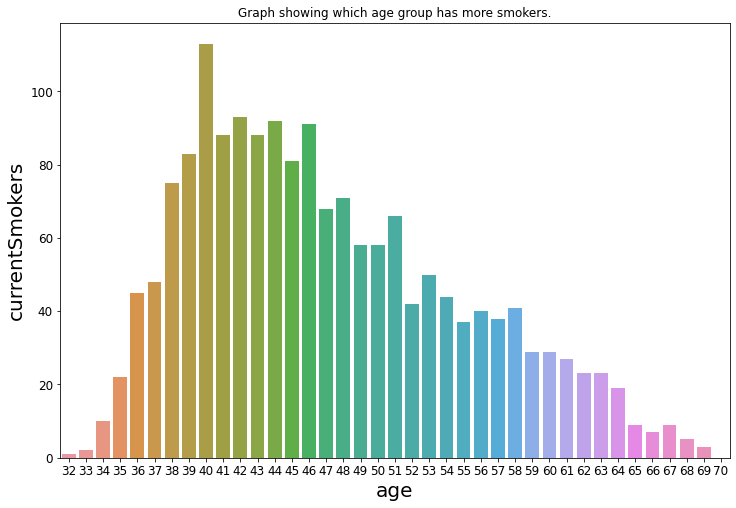

In [395]:
#Ploting the above values

plt.figure(figsize=(12,8))
sns.barplot(x=graph_7["age"], y=graph_7["currentSmoker"])
plt.title("Graph showing which age group has more smokers.")
plt.xlabel("age", size=20)
plt.ylabel("currentSmokers", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

plt.title?

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

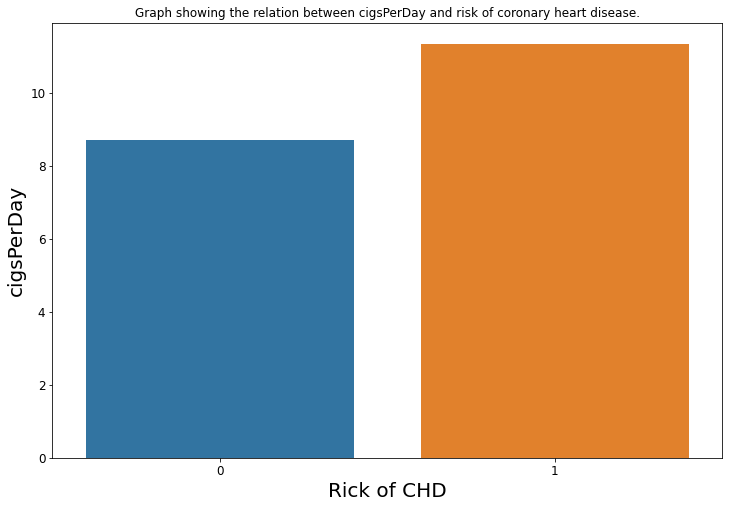

In [279]:
#Relation between cigsPerDay and risk of coronary heart disease.



graph_7 = SI_data.groupby("TenYearCHD", as_index=False).cigsPerDay.mean()

plt.figure(figsize=(12,8))
sns.barplot(x=graph_7["TenYearCHD"], y=graph_7["cigsPerDay"])
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.")
plt.xlabel("Rick of CHD", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

In [267]:
#Checking correlation with the target variable
SI_data.corrwith(SI_data['TenYearCHD'])*100

male                10.951349
age                 21.491583
education           -4.727712
currentSmoker        3.875060
cigsPerDay           7.651697
BPMeds               4.496514
prevalentStroke      5.002911
prevalentHyp        13.339499
diabetes            -0.380074
totChol              5.778906
sysBP               16.364718
diaBP                8.763162
BMI                  5.543735
heartRate            0.529970
glucose              0.372220
TenYearCHD         100.000000
dtype: float64

<AxesSubplot:>

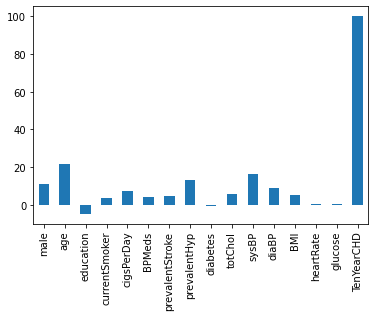

In [268]:
#Plotting the correlation
(SI_data.corrwith(SI_data['TenYearCHD'])*100).plot(kind='bar')

# Model Building

In [364]:
SI_data_mod = SI_data.copy(deep=True)

In [365]:
#use only select features

predictors=['male','age','prevalentHyp','sysBP','diaBP','cigsPerDay']
xdata=SI_data_mod[predictors]
ydata=SI_data_mod['TenYearCHD']

In [366]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, random_state=100, test_size=0.25, stratify=ydata)

In [367]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yprediction=logreg.predict(X_test)

In [368]:
from sklearn.metrics import accuracy_score

print("Accuracy=", accuracy_score( y_test,yprediction))

Accuracy= 0.8732718894009217


In [369]:

y_test.value_counts()

0    756
1    112
Name: TenYearCHD, dtype: int64

In [370]:
#confusion Matrix
# IMPORTANT: first argument is actual values, second argument is predicted values
from sklearn import metrics
confusionmatrix=metrics.confusion_matrix(y_test,yprediction)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

[[755   1]
 [109   3]]


In [371]:
print("True Positive cases=",TP)
print("True Negative cases=",TN)
print("False Positive cases=",FP)
print("False Negative cases=",FN)
Total_Positive_Cases=FN+TP
print("Total positive cases=",Total_Positive_Cases)
Total_Negative_Cases=FP+TN
print("Total negative cases=",Total_Negative_Cases)

True Positive cases= 3
True Negative cases= 755
False Positive cases= 1
False Negative cases= 109
Total positive cases= 112
Total negative cases= 756


In [372]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
print("accuracy=",accuracy)
print("accuracy=",accuracy_score(y_test, yprediction))

accuracy= 0.8732718894009217
accuracy= 0.8732718894009217


In [374]:
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)

sensitivity= 0.026785714285714284


In [377]:
specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

specificity= 0.9986772486772487


In [378]:
precision=TP/(TP+FP)
print("precision=", precision)

precision= 0.75


In [379]:
F1_score= 2*precision*sensitivity/(precision+sensitivity)
print("F1 Score=", F1_score )

F1 Score= 0.051724137931034475


# Under Sampling and Over Sampling

In [320]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [323]:
#Making a copy

SI_data_mod = SI_data.copy(deep=True)

In [337]:
#Checking data imbalance
SI_data_mod.TenYearCHD.value_counts()

0    3025
1     447
Name: TenYearCHD, dtype: int64

In [339]:
# create object of RandomUnderSample with undersample ratio as 158/250

rus = RandomUnderSampler(sampling_strategy = (447/500))

In [340]:
#Divide Predictor Varibles(X) and Target Varible(y)

X = SI_data_mod.loc[:,SI_data_mod.columns!='TenYearCHD' ]
y = SI_data_mod.loc[:,'TenYearCHD']

In [341]:
X.shape

(3472, 15)

In [342]:
X, y = rus.fit_resample(X, y)

In [343]:
y.value_counts()

0    500
1    447
Name: TenYearCHD, dtype: int64

In [344]:
# Check the shape and value counts
print(X.shape)
print(y.shape)
print(y.value_counts())

(947, 15)
(947,)
0    500
1    447
Name: TenYearCHD, dtype: int64


In [345]:
# Append and Prepare the final Dataset
X['TenYearCHD'] = y


In [346]:
X.shape

(947, 16)

In [347]:
X.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,55,2.0,1,5.0,0.0,0,0,0,315.0,123.0,77.5,26.21,75.0,84.000000,0
1,0,51,1.0,0,0.0,0.0,0,0,0,197.0,126.0,86.0,24.16,75.0,81.883169,0
2,0,48,4.0,1,17.0,0.0,0,0,0,299.0,132.0,81.0,24.35,75.0,70.000000,0
3,0,36,2.0,1,20.0,0.0,0,0,0,272.0,113.0,66.5,20.69,67.0,59.000000,0
4,0,62,2.0,1,3.0,0.0,0,0,0,286.0,123.0,77.0,20.56,59.0,86.000000,0


# Model Building after sampling


In [381]:
X_data =X.copy(deep=True)
X_data.shape

(947, 16)

In [382]:
#use only select features

predictors=['male','age','prevalentHyp','sysBP','diaBP','cigsPerDay']
xdata=X_data[predictors]
ydata=X_data['TenYearCHD']

In [383]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, random_state=100, test_size=0.25, stratify=ydata)

In [384]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yprediction=logreg.predict(X_test)

In [385]:

print("Accuracy=", accuracy_score( y_test,yprediction))

Accuracy= 0.6624472573839663


In [386]:
y_test.value_counts()

0    125
1    112
Name: TenYearCHD, dtype: int64

In [387]:
#confusion Matrix
# IMPORTANT: first argument is actual values, second argument is predicted values
from sklearn import metrics
confusionmatrix=metrics.confusion_matrix(y_test,yprediction)
print(confusionmatrix)
TN=confusionmatrix[0,0]
FP=confusionmatrix[0,1]
FN=confusionmatrix[1,0]
TP=confusionmatrix[1,1]

[[84 41]
 [39 73]]


In [388]:
sensitivity=TP/Total_Positive_Cases
print("sensitivity=",sensitivity)

specificity=TN/Total_Negative_Cases
print("specificity=",specificity)

precision=TP/(TP+FP)
print("precision=", precision)

sensitivity= 0.6517857142857143
specificity= 0.1111111111111111
precision= 0.6403508771929824


In [389]:
F1_score= 2*precision*sensitivity/(precision+sensitivity)
print("F1 Score=", F1_score )

F1 Score= 0.6460176991150443
